In [201]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
from prophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
df=pd.read_csv('TSLA.csv')

#taking only 2 column
df = df[['Date', 'Close']]


In [203]:
df.head()


,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


<AxesSubplot: >

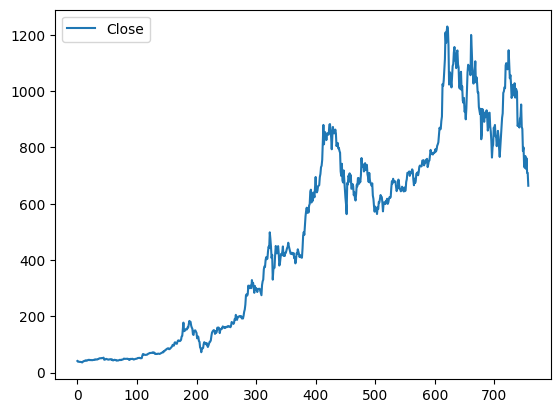

In [206]:
# plotting data 
df.plot()


In [207]:
#ds is compulsary
df.columns = ['ds','y']
df.head()

,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [208]:
df['ds'] = pd.to_datetime(df['ds'])

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      758 non-null    datetime64[ns]
 1   y       758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [210]:
dir(Prophet)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components'

In [211]:
# Initialize the Model
model=Prophet()

In [212]:
# checking the column 
df.columns


Index(['ds', 'y'], dtype='object')

In [213]:
df.dropna(axis=0,inplace=True)


In [214]:
df.head()


,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [215]:
model.fit(df)


22:23:50 - cmdstanpy - INFO - Chain [1] start processing
22:23:50 - cmdstanpy - INFO - Chain [1] done processing


In [216]:
model.component_modes


{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [217]:
### Create future dates of 365 days period
future_dates=model.make_future_dataframe(periods=365)

In [218]:
future_dates.tail()


,ds
1118,2023-05-16
1119,2023-05-17
1120,2023-05-18
1121,2023-05-19
1122,2023-05-20


In [219]:
prediction=model.predict(future_dates)


In [220]:
prediction.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-21,144.741962,-48.820884,117.409704,144.741962,144.741962,-113.574944,-113.574944,-113.574944,22.026766,22.026766,22.026766,-135.601710,-135.601710,-135.601710,0.0,0.0,0.0,31.167018
1,2019-05-22,143.888289,-59.395036,111.422300,143.888289,143.888289,-112.736338,-112.736338,-112.736338,22.501753,22.501753,22.501753,-135.238091,-135.238091,-135.238091,0.0,0.0,0.0,31.151951
2,2019-05-23,143.034616,-61.184380,111.833180,143.034616,143.034616,-115.303068,-115.303068,-115.303068,19.029746,19.029746,19.029746,-134.332814,-134.332814,-134.332814,0.0,0.0,0.0,27.731548
3,2019-05-24,142.180943,-64.944945,113.031861,142.180943,142.180943,-115.117306,-115.117306,-115.117306,17.825671,17.825671,17.825671,-132.942977,-132.942977,-132.942977,0.0,0.0,0.0,27.063636
4,2019-05-28,138.766250,-50.070228,127.090784,138.766250,138.766250,-101.891458,-101.891458,-101.891458,22.026766,22.026766,22.026766,-123.918224,-123.918224,-123.918224,0.0,0.0,0.0,36.874791


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


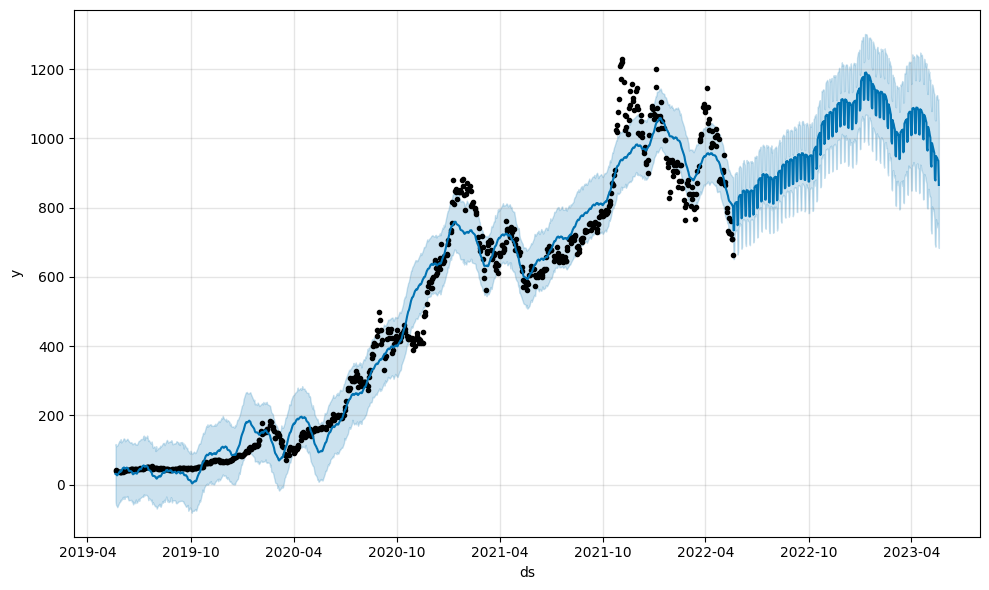

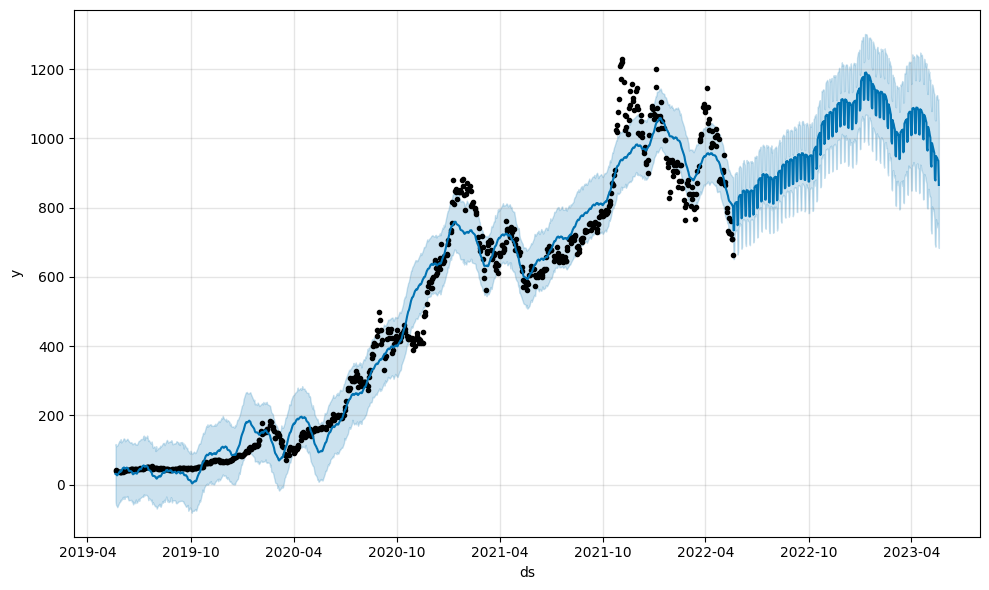

In [221]:
### plotting the predicted projection
model.plot(prediction)


In [223]:
# Time Series Analysis

# 1960-1962
# Cross Validation
# 1960-61---Train dataset
# 1961-62--Test dataset
# 1962-63---Validation

In [224]:
df.head()


,ds,y
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [225]:
# using
rom prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/1 [00:00<?, ?it/s]

22:23:53 - cmdstanpy - INFO - Chain [1] start processing
22:23:54 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-05-21,631.463446,592.925914,671.317949,580.880005,2021-05-20
1,2021-05-24,639.145723,600.312116,679.529975,606.440002,2021-05-20
2,2021-05-25,642.886580,606.303377,682.275829,604.690002,2021-05-20
3,2021-05-26,645.174920,606.402581,684.359336,619.130005,2021-05-20
4,2021-05-27,647.534914,612.018570,686.708770,630.849976,2021-05-20


In [226]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2757.778330,52.514554,47.437443,0.078209,0.079606,0.074618,0.36
1,39 days,2663.084213,51.605079,45.967396,0.075529,0.070480,0.072092,0.40
2,40 days,2620.466495,51.190492,44.741349,0.073493,0.070480,0.070112,0.40
3,41 days,2562.195557,50.618135,43.272884,0.071054,0.070480,0.067750,0.44
4,42 days,2536.480990,50.363489,42.469326,0.069722,0.070480,0.066452,0.44


In [227]:
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2757.778330,52.514554,47.437443,0.078209,0.079606,0.074618,0.36
1,39 days,2663.084213,51.605079,45.967396,0.075529,0.070480,0.072092,0.40
2,40 days,2620.466495,51.190492,44.741349,0.073493,0.070480,0.070112,0.40
3,41 days,2562.195557,50.618135,43.272884,0.071054,0.070480,0.067750,0.44
4,42 days,2536.480990,50.363489,42.469326,0.069722,0.070480,0.066452,0.44


In [230]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,2757.778330,52.514554,47.437443,0.078209,0.079606,0.074618,0.36
1,39 days,2663.084213,51.605079,45.967396,0.075529,0.070480,0.072092,0.40
2,40 days,2620.466495,51.190492,44.741349,0.073493,0.070480,0.070112,0.40
3,41 days,2562.195557,50.618135,43.272884,0.071054,0.070480,0.067750,0.44
4,42 days,2536.480990,50.363489,42.469326,0.069722,0.070480,0.066452,0.44
...,...,...,...,...,...,...,...,...
224,361 days,6510.098152,80.685179,70.265763,0.083058,0.053766,0.079518,1.00
225,362 days,6975.018284,83.516575,73.192537,0.087395,0.071951,0.083384,1.00
226,363 days,7986.734106,89.368530,77.860133,0.094763,0.077418,0.089712,1.00
227,364 days,8818.672341,93.907786,81.189948,0.100894,0.077418,0.094718,1.00
